<p style="text-align: center; font-size: 24px; font-weight: bold;">Variables</p>


<table style="border-collapse: collapse; width: 100%;">
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">id</td>
        <td style="border: 1px solid black; padding: 8px;">Unique identifier</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">class</td>
        <td style="border: 1px solid black; padding: 8px;">Indicates if the mushroom is poisonous (p) or edible (e)</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">cap-diameter</td>
        <td style="border: 1px solid black; padding: 8px;">Diameter of the cap (in mm)</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">cap-shape</td>
        <td style="border: 1px solid black; padding: 8px;">Shape of the cap</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">cap-surface</td>
        <td style="border: 1px solid black; padding: 8px;">Surface texture of the cap</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">cap-color</td>
        <td style="border: 1px solid black; padding: 8px;">Color of the cap</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">does-bruise-or-bleed</td>
        <td style="border: 1px solid black; padding: 8px;">Indicates if the mushroom bruises or bleeds</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">gill-attachment</td>
        <td style="border: 1px solid black; padding: 8px;">Attachment of the gills to the stem</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">gill-spacing</td>
        <td style="border: 1px solid black; padding: 8px;">Spacing between the gills</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">gill-color</td>
        <td style="border: 1px solid black; padding: 8px;">Color of the gills</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">stem-height</td>
        <td style="border: 1px solid black; padding: 8px;">Height of the stem (in mm)</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">stem-width</td>
        <td style="border: 1px solid black; padding: 8px;">Width of the stem (in mm)</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">stem-root</td>
        <td style="border: 1px solid black; padding: 8px;">Structure of the stem's base</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">stem-surface</td>
        <td style="border: 1px solid black; padding: 8px;">Surface texture of the stem</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">stem-color</td>
        <td style="border: 1px solid black; padding: 8px;">Color of the stem</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">veil-type</td>
        <td style="border: 1px solid black; padding: 8px;">Type of the veil on the cap</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">veil-color</td>
        <td style="border: 1px solid black; padding: 8px;">Color of the veil</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">has-ring</td>
        <td style="border: 1px solid black; padding: 8px;">Indicates if there is a ring on the stem</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">ring-type</td>
        <td style="border: 1px solid black; padding: 8px;">Type of ring on the stem</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">spore-print-color</td>
        <td style="border: 1px solid black; padding: 8px;">Color of the spore print left by the mushroom</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">habitat</td>
        <td style="border: 1px solid black; padding: 8px;">The environment where the mushroom is found</td>
        <td style="border: 1px solid black; padding: 8px; font-weight: bold; font-size: 16px;">season</td>
        <td style="border: 1px solid black; padding: 8px;">The season in which the mushroom was observed</td>
    </tr>
</table>


## Configuration Library Imports

In [1]:

import warnings
warnings.filterwarnings("ignore")


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

from sklearn.model_selection import *
from sklearn.preprocessing import *
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [4]:

pd.set_option('display.max_columns', None)

from sklearn.model_selection import StratifiedKFold
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import matthews_corrcoef
from collections import Counter
import joblib


n_splits = 10
SEED = 42

In [5]:
# train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
# test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
# submission = pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv("./data/sample_submission.csv")



In [6]:

df = pd.concat([train, test], sort=False)


In [7]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [8]:
df.shape

(5194909, 22)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5194909.0,2.597454e+06,1.499641e+06,0.0,1298727.00,2597454.00,3896181.00,5194908.00
cap-diameter,5194898.0,6.308386e+00,4.668963e+00,0.0,3.32,5.74,8.24,607.00
stem-height,5194908.0,6.347604e+00,2.699444e+00,0.0,4.67,5.88,7.41,88.72
stem-width,5194909.0,1.115162e+01,8.097359e+00,0.0,4.97,9.65,15.62,102.91


<Axes: >

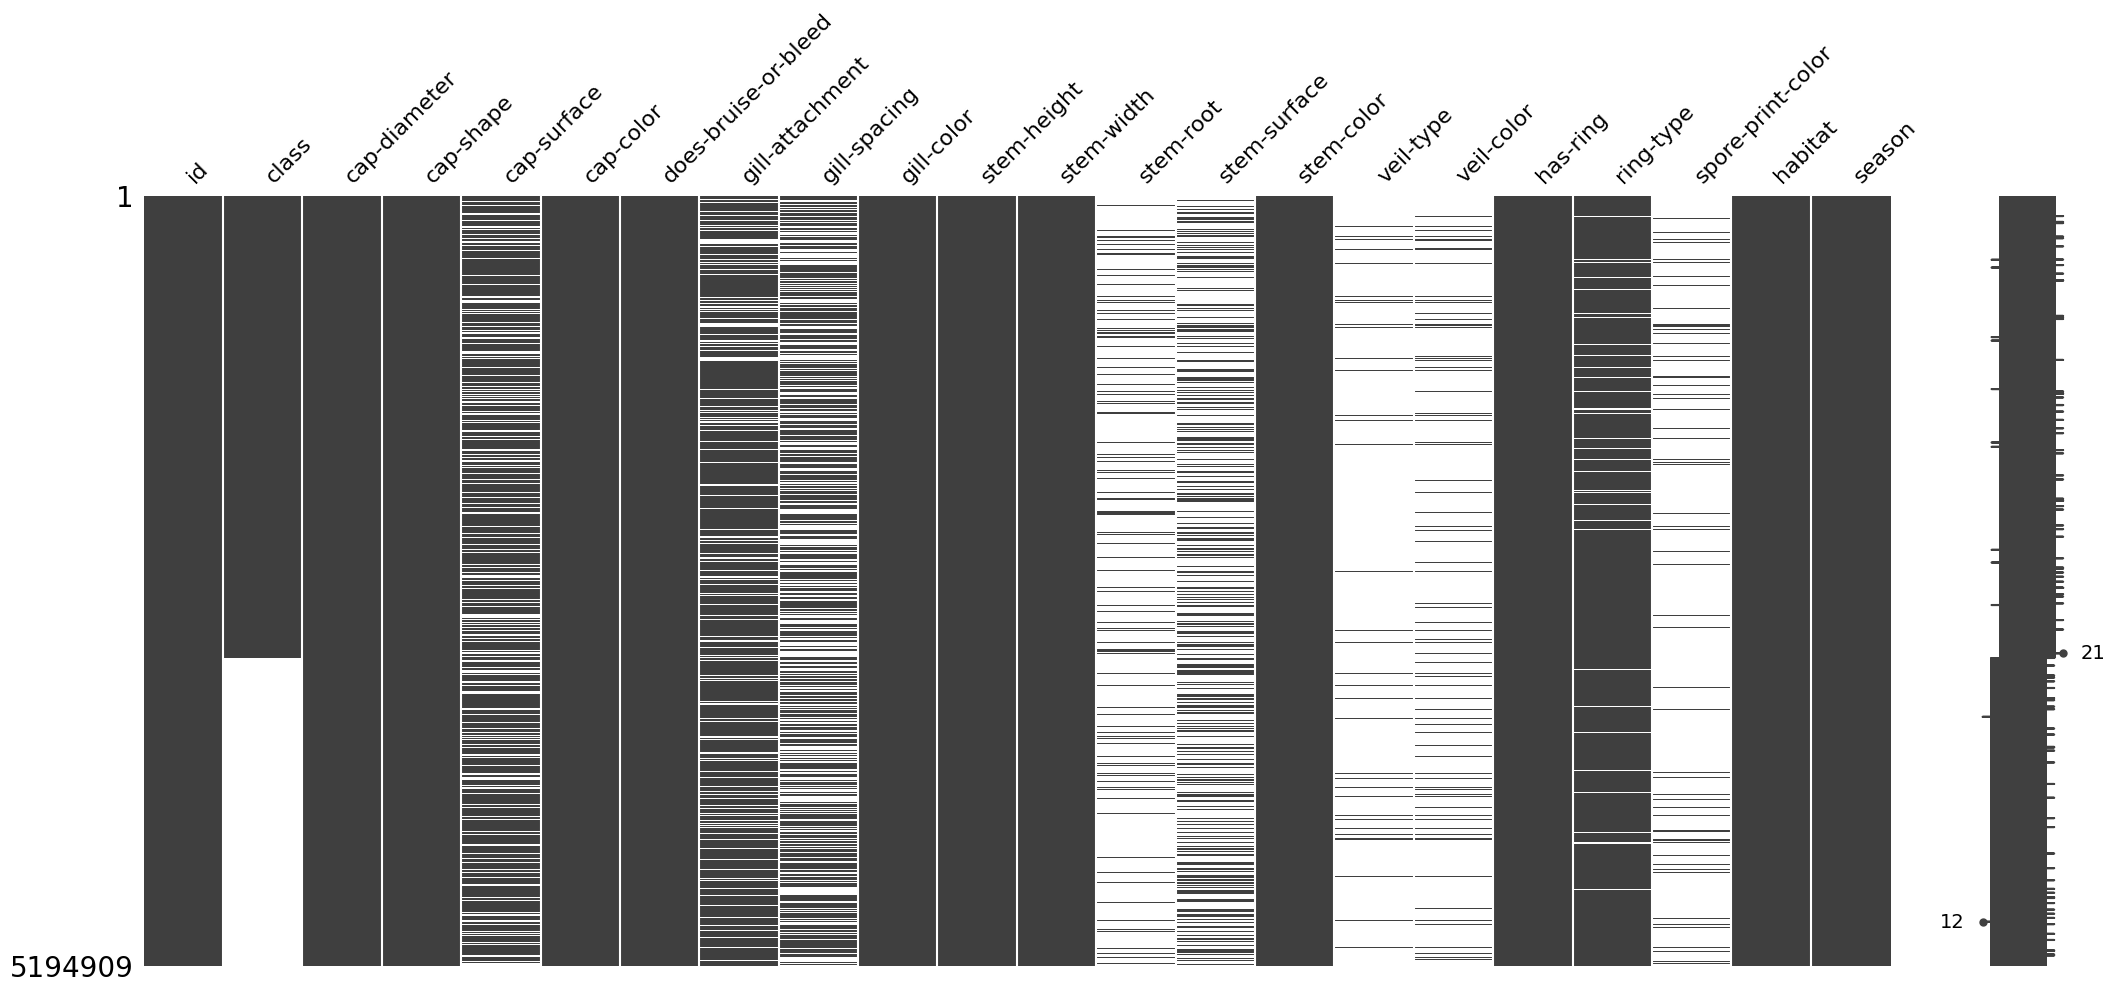

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
def INFO(df):
    data = pd.DataFrame()
    data['Missing Values'] = df.isnull().sum()
    data['% Missing'] = round((df.isnull().sum() / len(df)) * 100, 2)
    data['N Unique Values'] = df.nunique()
    data['Data Type'] = df.dtypes
    
    print("Basic DataFrame Information:")
    print(data)
    print("\nDataFrame Summary:")
    df.describe(include='all')
    
    # Plot missing values
    plt.figure(figsize=(10, 6))
    msno.bar(df)
    plt.show()

    plt.figure(figsize=(10, 6))
    msno.heatmap(df)
    plt.show()


Basic DataFrame Information:
                      Missing Values  % Missing  N Unique Values Data Type
id                                 0       0.00          5194909     int64
class                        2077964      40.00                2    object
cap-diameter                      11       0.00             4145   float64
cap-shape                         71       0.00              108    object
cap-surface                  1117927      21.52              114    object
cap-color                         25       0.00              109    object
does-bruise-or-bleed              18       0.00               29    object
gill-attachment               873757      16.82              117    object
gill-spacing                 2098030      40.39               66    object
gill-color                       106       0.00               86    object
stem-height                        1       0.00             2858   float64
stem-width                         0       0.00             6194   floa

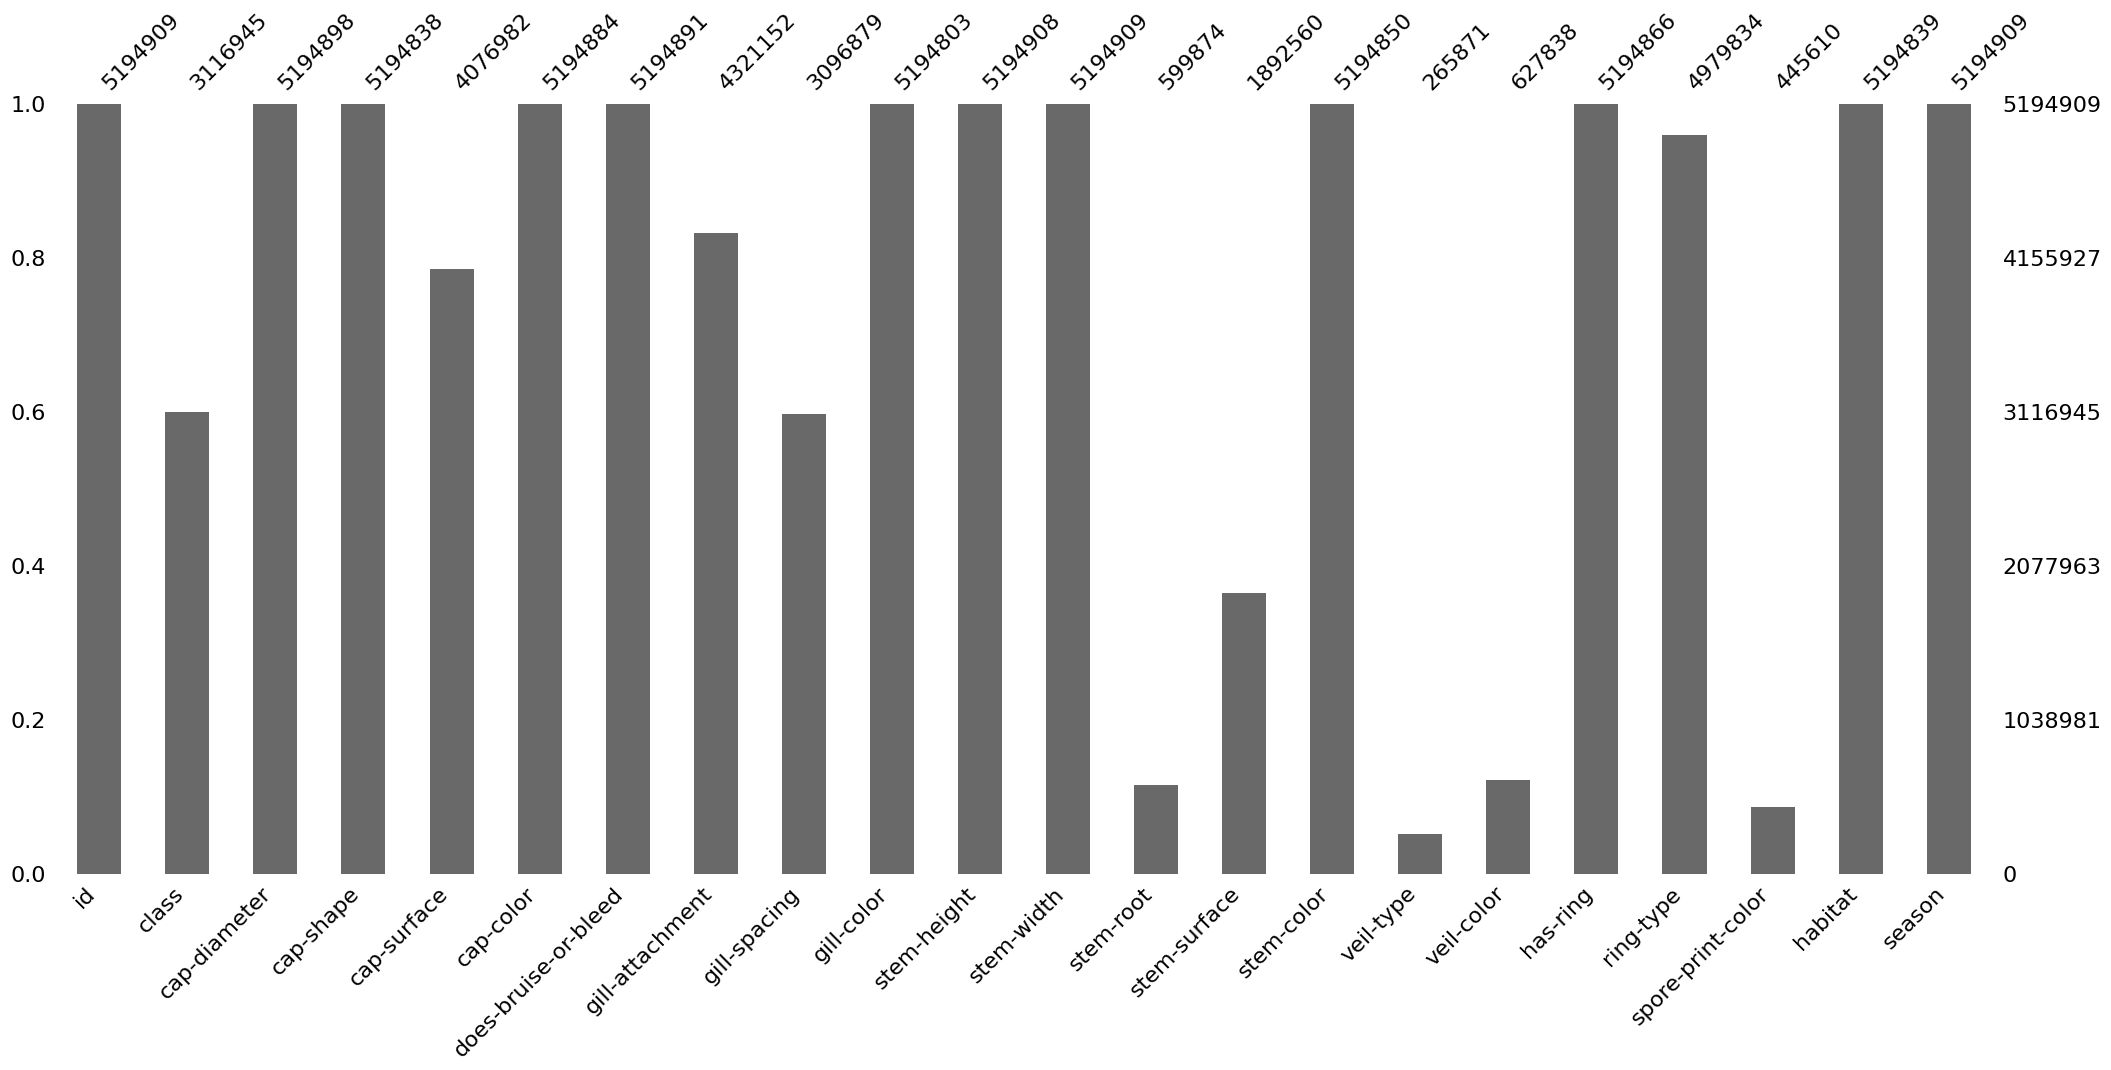

<Figure size 1000x600 with 0 Axes>

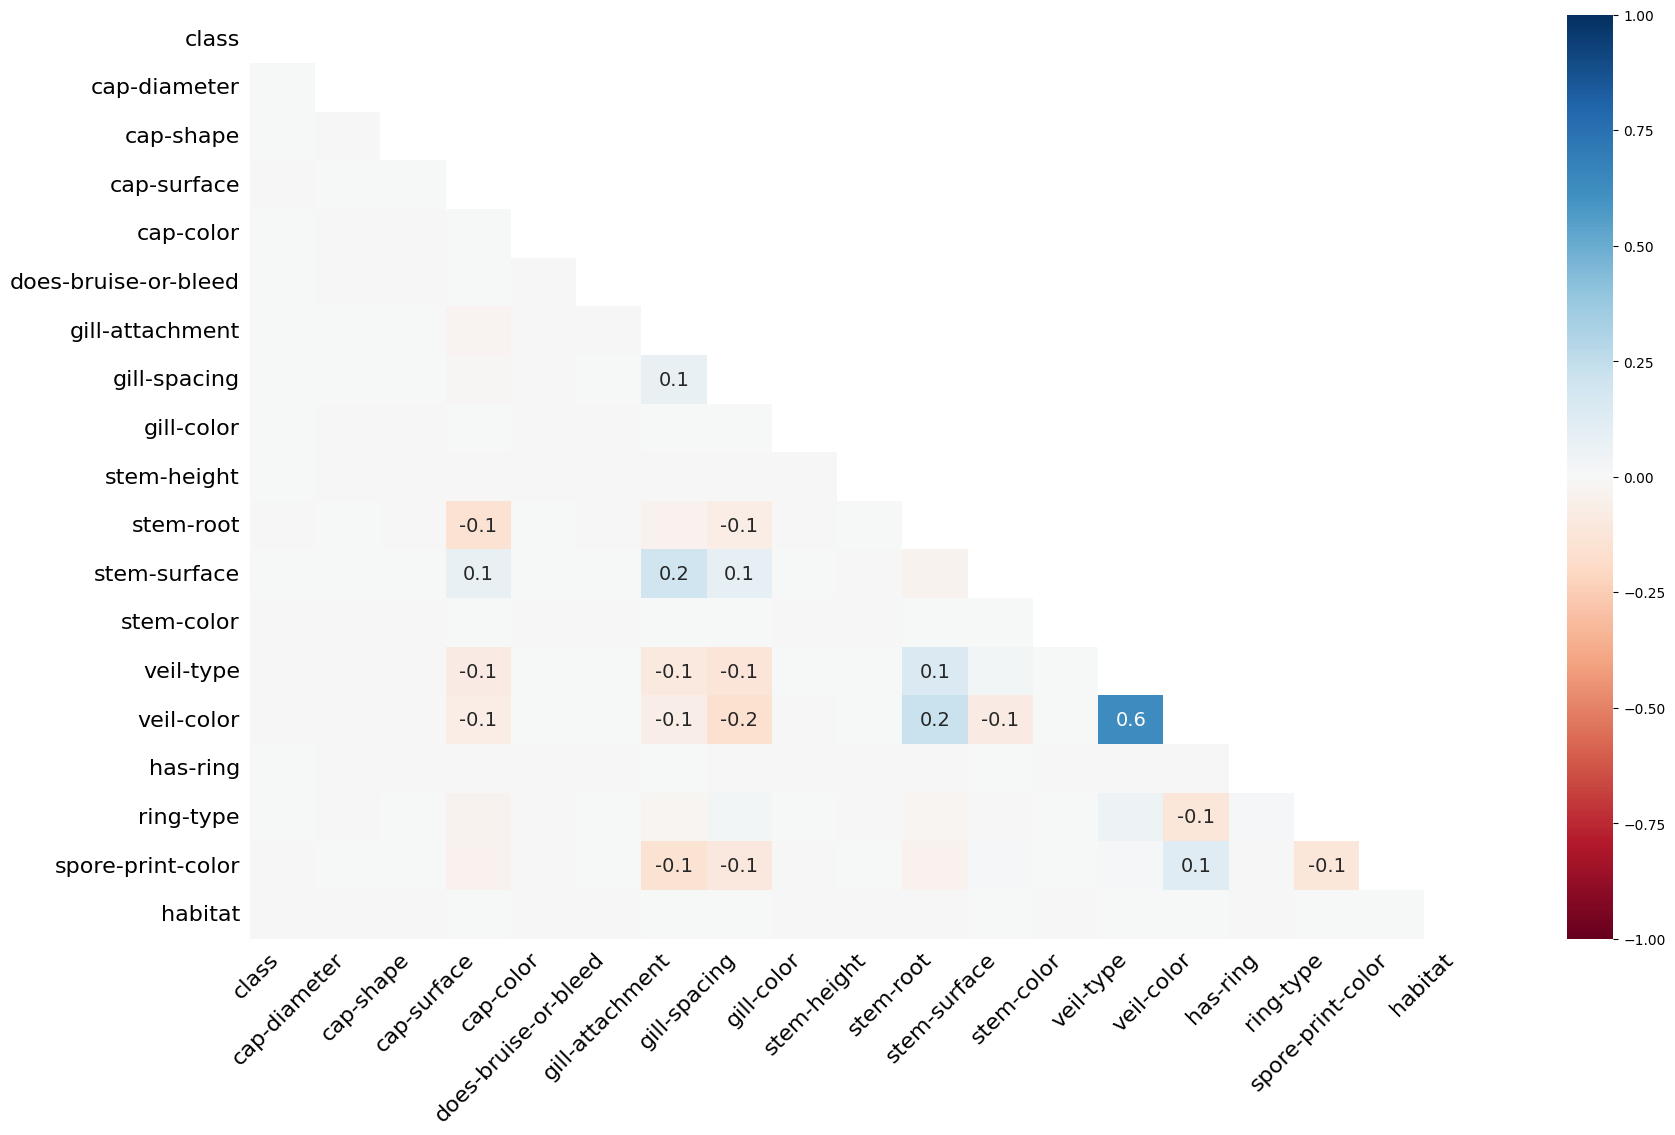

In [12]:
INFO(df)

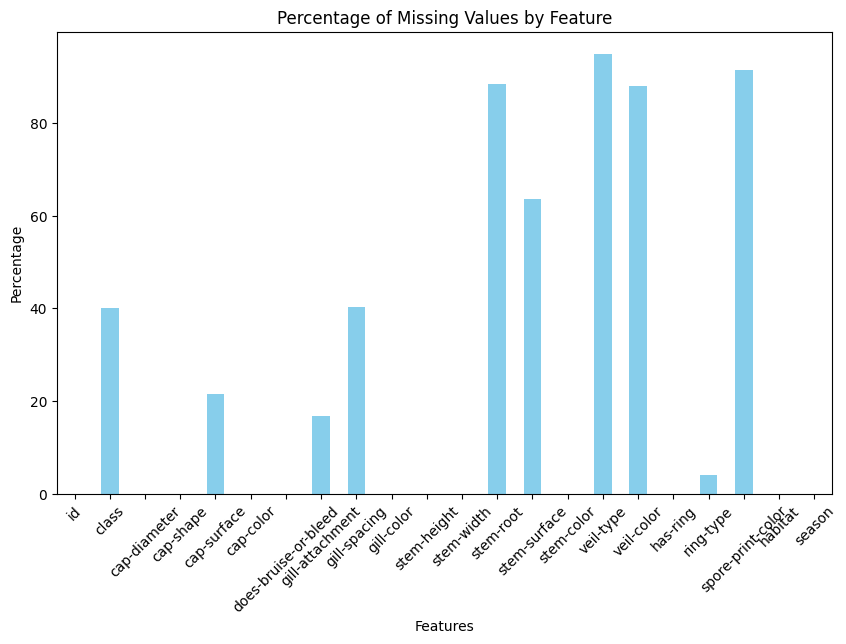

In [13]:
# Calculate missing values
missing_values = df.isnull().mean() * 100

# Plot
missing_values.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5194909 entries, 0 to 2077963
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory usag

In [16]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [18]:
# num_cols = train_data.select_dtypes(include=['float64']).columns
# train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
# test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())



In [19]:

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [22]:
print("The numerical columns are: ", num_cols)

The numerical columns are:  Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [23]:
print("The categorical columns are: ", cat_cols)

The categorical columns are:  Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')


In [25]:
df.isnull().sum().sort_values(ascending=False)

veil-type               4929038
spore-print-color       4749299
stem-root               4595035
veil-color              4567071
stem-surface            3302349
gill-spacing            2098030
class                   2077964
cap-surface             1117927
gill-attachment          873757
ring-type                215075
gill-color                  106
cap-shape                    71
habitat                      70
stem-color                   59
has-ring                     43
cap-color                    25
does-bruise-or-bleed         18
cap-diameter                 11
stem-height                   1
id                            0
stem-width                    0
season                        0
dtype: int64

## **Exploratory Data Analysis** 

- (EDA) is a crucial step in the data analysis process. 
- It allows us to summarize the main characteristics of the data, gain better understanding of the dataset, uncover relationships between different variables, and extract important variables.

## **Distribution of `Target`**

In [31]:
value_counts = df['class'].value_counts()
percentages = 100 * value_counts / len(df)

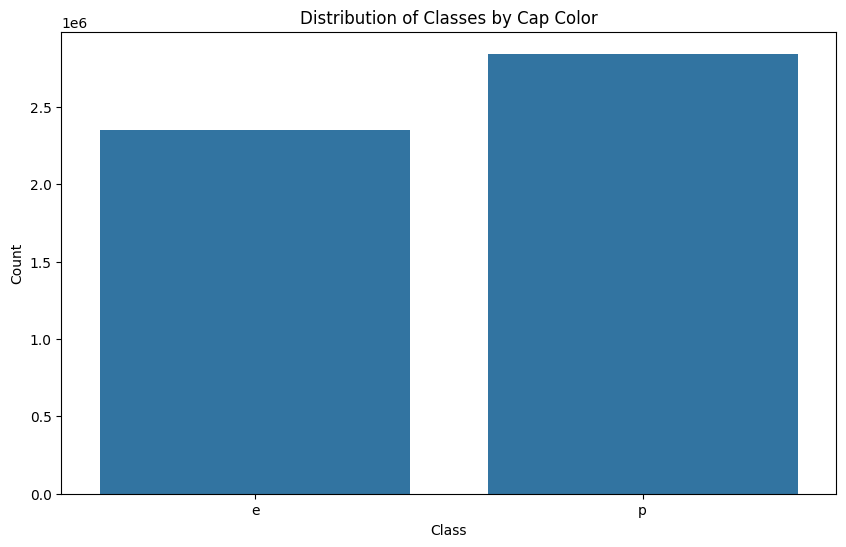

In [32]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes by Cap Color')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


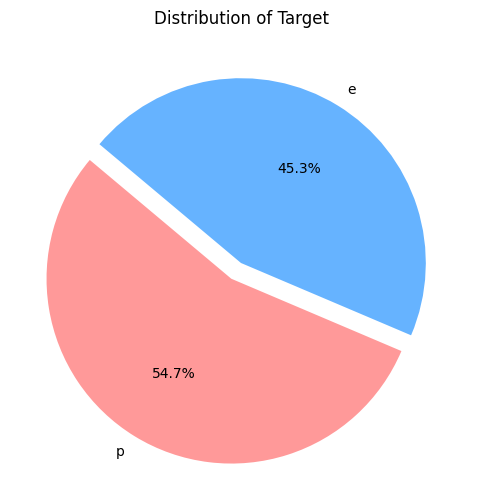

In [33]:

# Pie chart
plt.figure(figsize=(8, 6))
explode = (0.1, 0)  # explode the first slice
colors = ['#ff9999','#66b3ff']  # custom colors
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.title('Distribution of Target')
plt.show()
